# SWIGGY SALES ANALYSIS

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Import Data

In [2]:
df = pd.read_excel("swiggy_data.xlsx")

In [3]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [4]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


#### MetaData

In [5]:
print("Number of Rows:",df.shape[0])

Number of Rows: 197430


In [6]:
print("Number of Columns:",df.shape[1])

Number of Columns: 10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


#### Data Types

In [8]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


## KPIs

#### Total Sales

In [9]:
total_sales = df["Price (INR)"].sum()
print("Total Sales(INR):", round(total_sales,2))

Total Sales(INR): 53012505.77


#### Average Rating

In [10]:
average_rating = df["Rating"].mean()
print("Average Rating:", round(average_rating,1))

Average Rating: 4.3


#### Average Order Value

In [11]:
avg_order_value = df["Price (INR)"].mean()
print("Average Order Value(INR):", round(avg_order_value,2))

Average Order Value(INR): 268.51


#### Ratings Count

In [12]:
ratings_count = df["Rating Count"].sum()
print("Ratings Count:", round(ratings_count,2))

Ratings Count: 5591574


#### Total Orders

In [13]:
total_orders = len(df)
print("Total Orders:", round(total_orders,2))

Total Orders: 197430


## CHARTS Design

#### Monthly Sales Trends

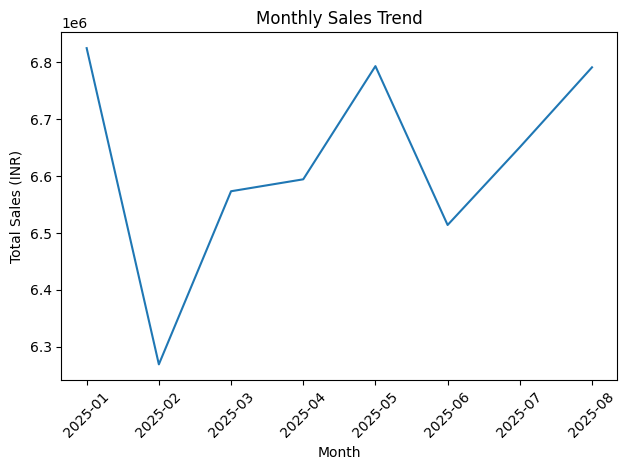

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)
monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()
plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation = 45)
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()

#### Daily Sales Trends

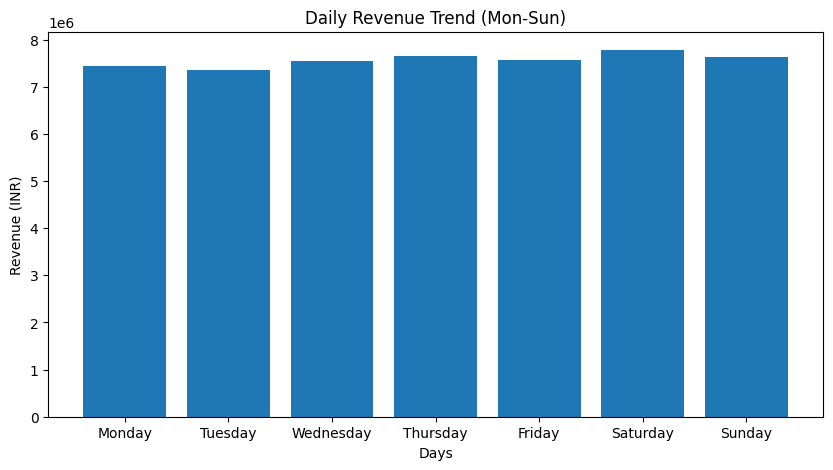

In [15]:
df["DayName"] = pd.to_datetime(df["Order Date"]).dt.day_name()
daily_revenue = (
    df.groupby("DayName")["Price (INR)"]
               .sum()
               .reindex(["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)
plt.figure(figsize = (10,5))
plt.bar(daily_revenue.index, daily_revenue.values)
plt.title("Daily Revenue Trend (Mon-Sun)")
plt.xlabel("Days")
plt.ylabel("Revenue (INR)")
plt.show()

#### Total Sales by Food Type (Veg vs Non - Veg)

In [16]:
non_veg_keywords = ["chicken", "egg", "fish", "muton", "prawn", "biryani", "kabab", "kebab", "non-veg", "non veg"]
df["Food Category"] = np.where(df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords), na = False), "Non-Veg", "Veg")

In [17]:
food_revenue = (df.groupby("Food Category")["Price (INR)"].sum().reset_index())

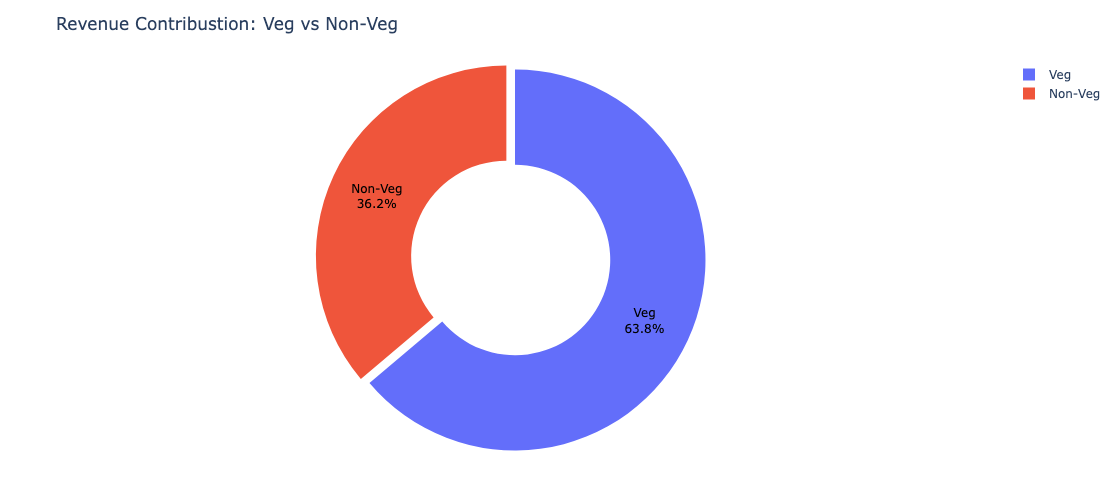

In [18]:
fig = px.pie(
    food_revenue,
    values = "Price (INR)",
    names = "Food Category",
    hole = 0.5,
    title = "Revenue Contribustion: Veg vs Non-Veg",
)
fig.update_traces(
    textinfo = "percent+label",
    pull = [0.05,0],
    textfont=dict(color="black")
)
fig.update_layout(
    height = 500,
    margin = dict(t=60,b=40,l=40,r=40)
)
fig.show()

#### Total Sales by State

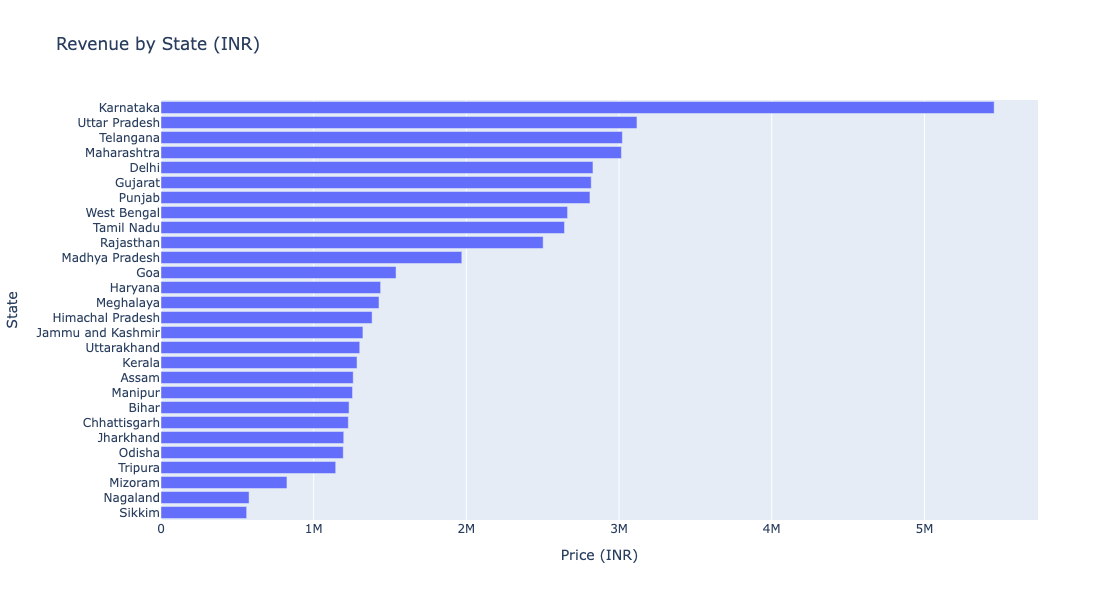

In [19]:
fig = px.bar(
    df.groupby("State", as_index = False)["Price (INR)"].sum()
      .sort_values("Price (INR)", ascending = False),
    x = "Price (INR)",
    y = "State",
    orientation = "h",
    title = "Revenue by State (INR)"
)
fig.update_layout(height = 600, yaxis = dict(autorange = "reversed"))
fig.show()

#### Quarterly Performance Summary

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Quarter"] = df["Order Date"].dt.to_period("Q").astype(str)
quarterly_summary = (
    df.groupby("Quarter", as_index = False)
    .agg(
        Total_Sales = ("Price (INR)", "sum"),
        Avg_Rating = ("Rating", "mean"),
        Total_Orders = ("Order Date", "count")
    )
    .sort_values("Quarter")
)
quarterly_summary["Total_Sales"] = quarterly_summary["Total_Sales"].round(0)
quarterly_summary["Avg_Rating"] = quarterly_summary["Avg_Rating"].round(2)
quarterly_summary

,Quarter,Total_Sales,Avg_Rating,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


#### Top 5 Cities by Sales

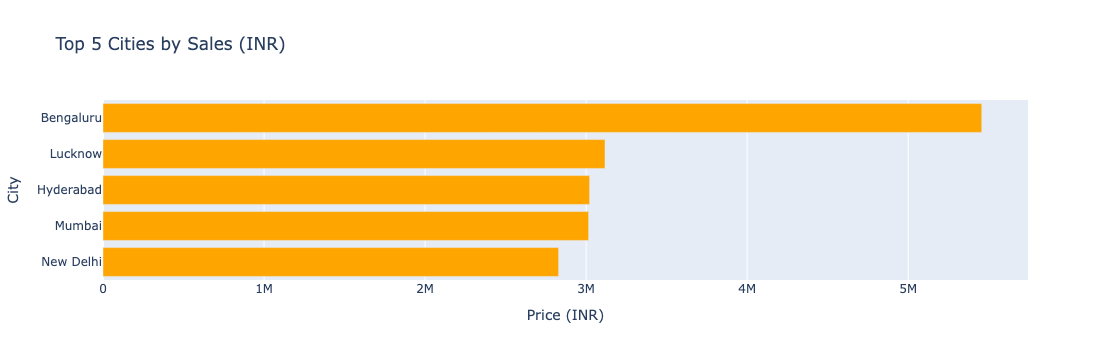

In [21]:
top_5_cities = (
    df.groupby("City") ["Price (INR)"]
    .sum()
    .nlargest(5)
    .sort_values()
    .reset_index()
)

fig = px.bar(
    top_5_cities,
    x = "Price (INR)",
    y = "City",
    orientation = "h",
    title = "Top 5 Cities by Sales (INR)",
    color_discrete_sequence = ["orange"]
)
fig.show()

#### Weekly Trend Analysis

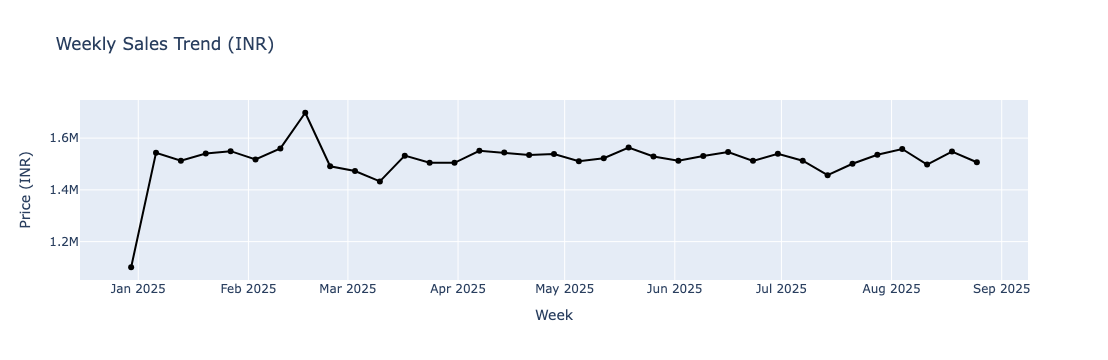

In [22]:
df["Week"] = pd.to_datetime(df["Order Date"]).dt.to_period("W").dt.start_time

weekly_sales = (
    df.groupby("Week")["Price (INR)"]
    .sum()
    .reset_index()
)

fig = px.line(
    weekly_sales,
    x="Week",
    y="Price (INR)",
    title="Weekly Sales Trend (INR)",
    markers=True,
    color_discrete_sequence=["black"]
)

fig.update_xaxes(dtick="M1", tickformat="%b %Y")
fig.show()